In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data/airline_passengers.csv', parse_dates=True, index_col=0)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.index.freq = 'MS'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


## splitting train, test

In [7]:
train = df.iloc[:109]
test = df.iloc[108:]

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## fitting model

In [10]:
fitted_model = ExponentialSmoothing(train['Thousands of Passengers'],
                                   trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=12).fit()

## forecasting

In [11]:
test_predictions = fitted_model.forecast(36)

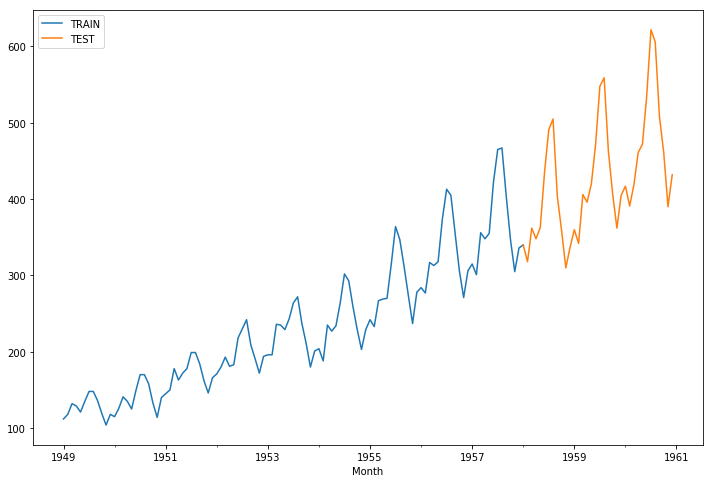

In [14]:
train['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test['Thousands of Passengers'].plot(legend=True, label='TEST', figsize=(12,8))

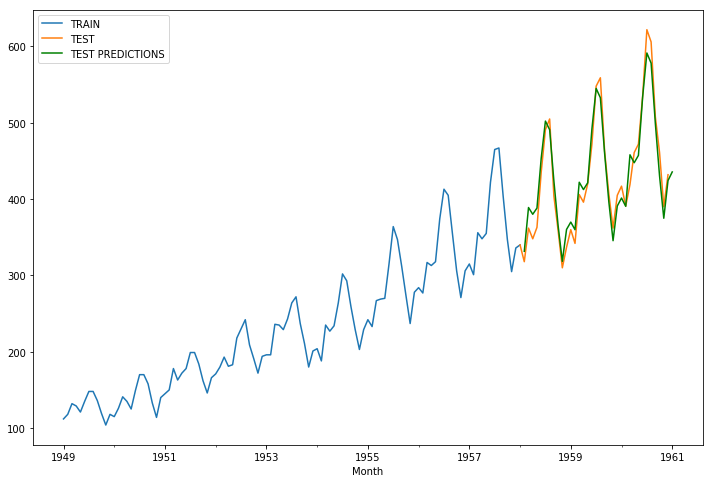

In [21]:
train['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test['Thousands of Passengers'].plot(legend=True, label='TEST', figsize=(12,8))
test_predictions.plot(legend=True, label='TEST PREDICTIONS', figsize=(12,8), color='green')

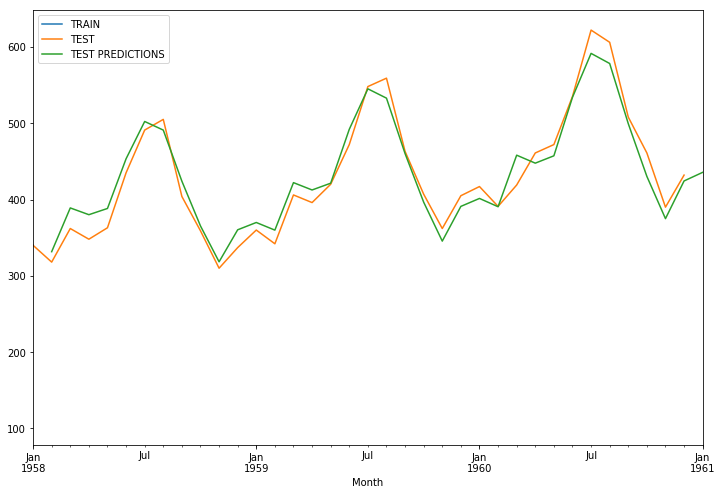

In [23]:
train['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test['Thousands of Passengers'].plot(legend=True, label='TEST', figsize=(12,8))
test_predictions.plot(legend=True, label='TEST PREDICTIONS', figsize=(12,8), xlim=['1958','1961'])

## evaluation

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
test.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [28]:
mean_absolute_error(test, test_predictions)

46.30290458492508

In [29]:
mean_squared_error(test, test_predictions)

3075.3284674025135

In [30]:
np.sqrt(mean_squared_error(test, test_predictions))

55.45564414378859

## forecasting in future

In [31]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [32]:
forecast_predictions = final_model.forecast(36)

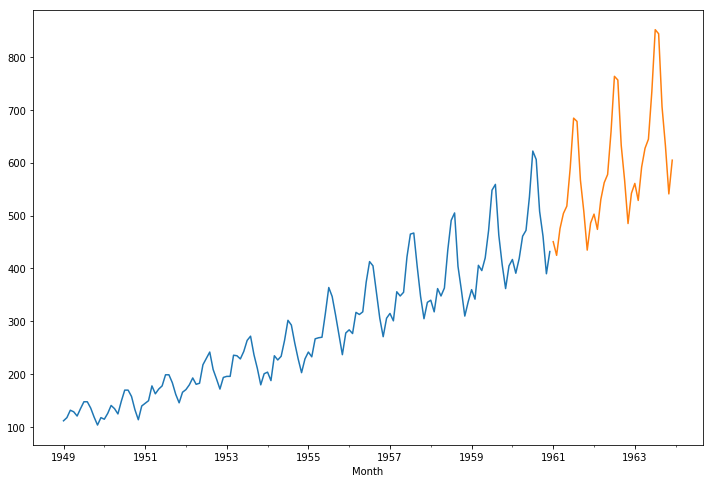

In [33]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()